# Multilayer model MNIST classification

Note: This notebook is desinged to run with CPU (no GPU) runtime.

Import modules.

In [1]:
import os, random
os.environ['PYTHONHASHSEED'] = str(20230515)
random.seed(20230515)

import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

np.random.seed(20190825)
tf.random.set_seed(20190825)

plt.rcParams.update({'font.size': 10})

Download the MNIST dataset and store into NumPy arrays.

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape(
                  (len(train_images), 784)).astype('float32') / 255
test_images = test_images.reshape(
                  (len(test_images), 784)).astype('float32') / 255
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

11490434/11490434 [==============================] - 0s 0us/step


Define the multilayer feedforward network model.

In [3]:
model = models.Sequential(name='multilayer_model')
model.add(layers.Dense(256, activation='relu', input_shape=(784,),
                            name='feedforward1'))
model.add(layers.Dense(512, activation='relu', name='feedforward2'))
model.add(layers.Dense(256, activation='relu', name='feedforward3'))
model.add(layers.Dense(10, activation='softmax', name='softmax'))

model.summary()

Model: "multilayer_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feedforward1 (Dense)        (None, 256)               200960    
                                                                 
 feedforward2 (Dense)        (None, 512)               131584    
                                                                 
 feedforward3 (Dense)        (None, 256)               131328    
                                                                 
 softmax (Dense)             (None, 10)                2570      
                                                                 
Total params: 466,442
Trainable params: 466,442
Non-trainable params: 0
_________________________________________________________________


Compile the model using the Adam optimizer, and categorical crossentroy as a loss function.

In [4]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

Train the model. It acheves around 98% accuracy for the test dataset.

In [5]:
history = model.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    batch_size=128, epochs=10)

Epoch 1/10
469/469 [==============================] - 8s 14ms/step - loss: 0.2312 - acc: 0.9312 - val_loss: 0.1070 - val_acc: 0.9649
Epoch 2/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0875 - acc: 0.9725 - val_loss: 0.0869 - val_acc: 0.9729
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0600 - acc: 0.9809 - val_loss: 0.0781 - val_acc: 0.9761
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0433 - acc: 0.9865 - val_loss: 0.0882 - val_acc: 0.9744
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0366 - acc: 0.9882 - val_loss: 0.1135 - val_acc: 0.9684
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0278 - acc: 0.9909 - val_loss: 0.0788 - val_acc: 0.9786
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0240 - acc: 0.9923 - val_loss: 0.0855 - val_acc: 0.9795
Epoch 8/10
469/469 [==============================] - 4s 8ms/step - loss: 

Show prodiction results (probability for each digit) for incorrect predictions.

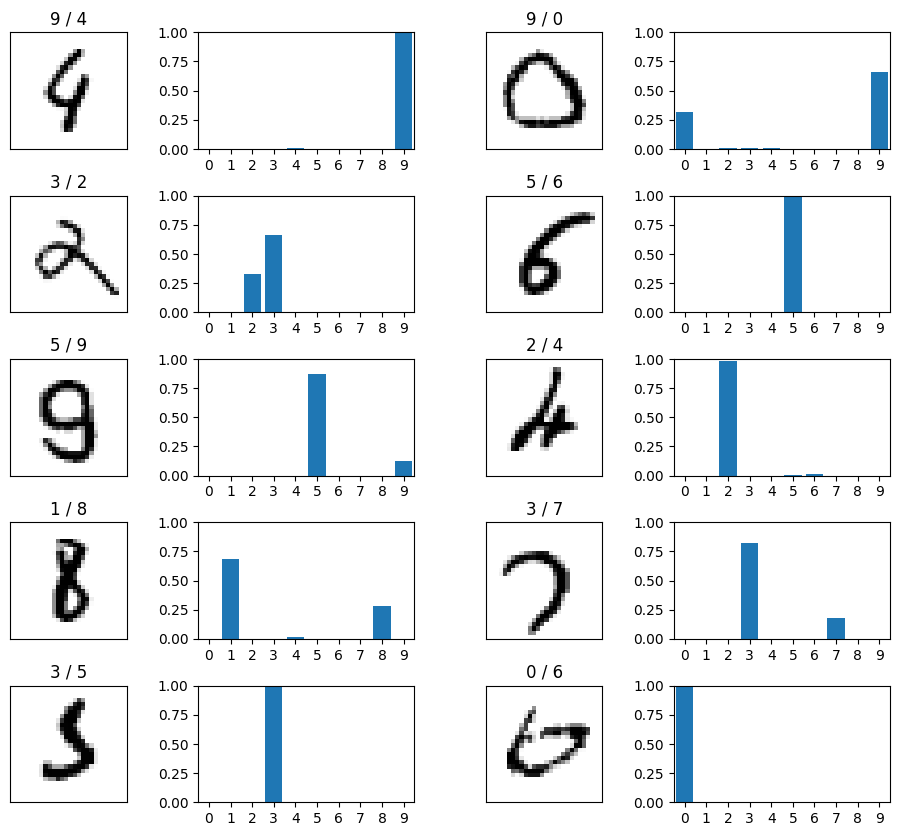

In [15]:
fig = plt.figure(figsize=(12, 10))
fig.subplots_adjust(wspace=0.1, hspace=0.4)
c = 0
for (image, label) in zip(test_images, test_labels):
    image
    p_val = model.predict(np.array([image]), verbose=0)
    pred = p_val[0]
    prediction, actual = np.argmax(pred), np.argmax(label)
    if prediction == actual:
        continue
    subplot = fig.add_subplot(5, 4, c*2+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('{} / {}'.format(prediction, actual))
    subplot.imshow(image.reshape((28, 28)),
                   vmin=0, vmax=1, cmap=plt.cm.gray_r)
    subplot = fig.add_subplot(5, 4, c*2+2)
    subplot.set_xticks(range(10))
    subplot.set_xlim(-0.5, 9.5)
    subplot.set_ylim(0, 1)
    subplot.bar(range(10), pred, align='center')
    c += 1
    if c == 10:
        break